# 1.4.10 Histograms in OpenCV

### Histograms - 1 : Find, Plot, Analyze !!!

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('photo.jpg', 0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

In [3]:
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

In [4]:
hist

array([   53,   188,   813,  1868,  2806,  3444,  4175,  5410,  6129,
        6304,  6149,  6516,  6889,  7700,  7045,  7053,  7556,  9838,
       11473, 12341, 14290, 16874, 18385, 18816, 18553, 19003, 19074,
       17820, 17108, 16458, 16212, 16937, 16482, 16738, 16788, 16929,
       16795, 16926, 17075, 17059, 17031, 16589, 16129, 16084, 16177,
       15939, 16090, 16453, 16627, 16781, 16843, 17068, 17106, 17093,
       16995, 16850, 16651, 16580, 16270, 16079, 15608, 15289, 14970,
       15005, 14765, 14567, 14448, 14477, 14483, 14354, 13875, 14051,
       14002, 13444, 13490, 13330, 13101, 12733, 12781, 12323, 12342,
       12199, 11870, 11757, 11685, 11643, 11405, 11299, 11335, 11112,
       11197, 11213, 10945, 11031, 10675, 10785, 10683, 10675, 10590,
       10596, 10339, 10313,  9994, 10073,  9885,  9916, 10032,  9786,
        9765,  9685,  9669,  9474,  9544,  9536,  9569,  9192,  9280,
        9276,  9128,  9171,  9048,  9055,  9038,  8733,  9020,  8866,
        8897,  8788,

In [5]:
bins

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

##### Plotting Histograms

In [33]:
img = cv2.imread('photo.jpg', 0)

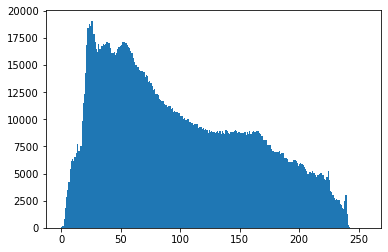

In [9]:
plt.hist(img.ravel(), 256, [0, 256]); plt.show()

In [17]:
img = cv2.imread('photo.jpg')
color = ('b', 'g', 'r')

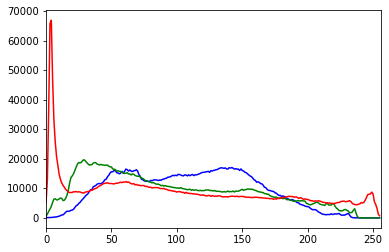

In [18]:
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256]])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.show()

##### Application of Mask

In [20]:
img = cv2.imread('photo.jpg', 0)

In [22]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img, img, mask = mask)

In [25]:
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

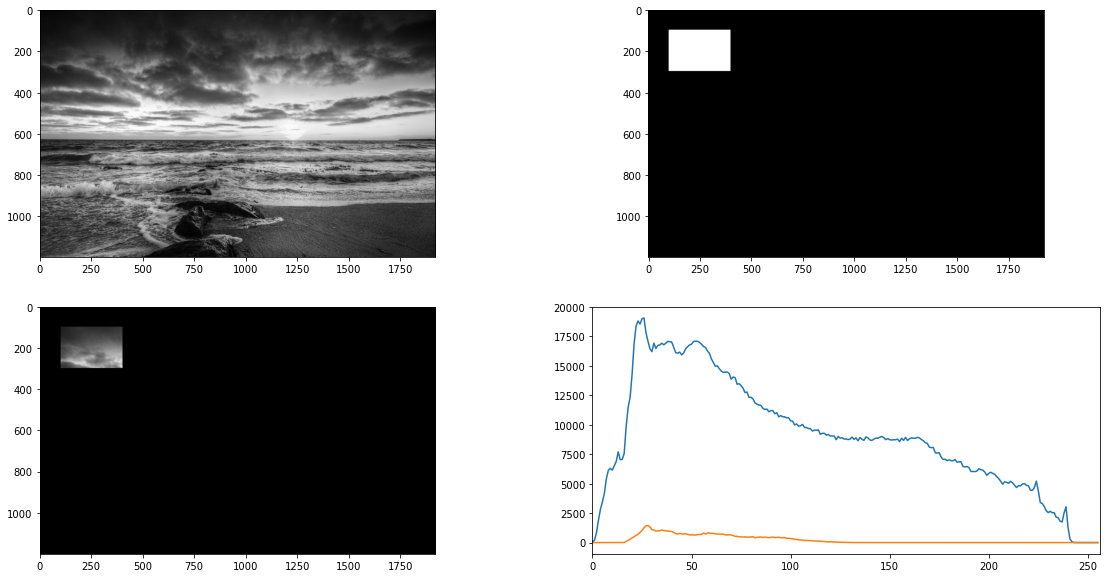

In [32]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

### Histograms - 2: Histogram Equalization

In [63]:
img = cv2.imread('wiki.jpg', 0)

In [64]:
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

In [65]:
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

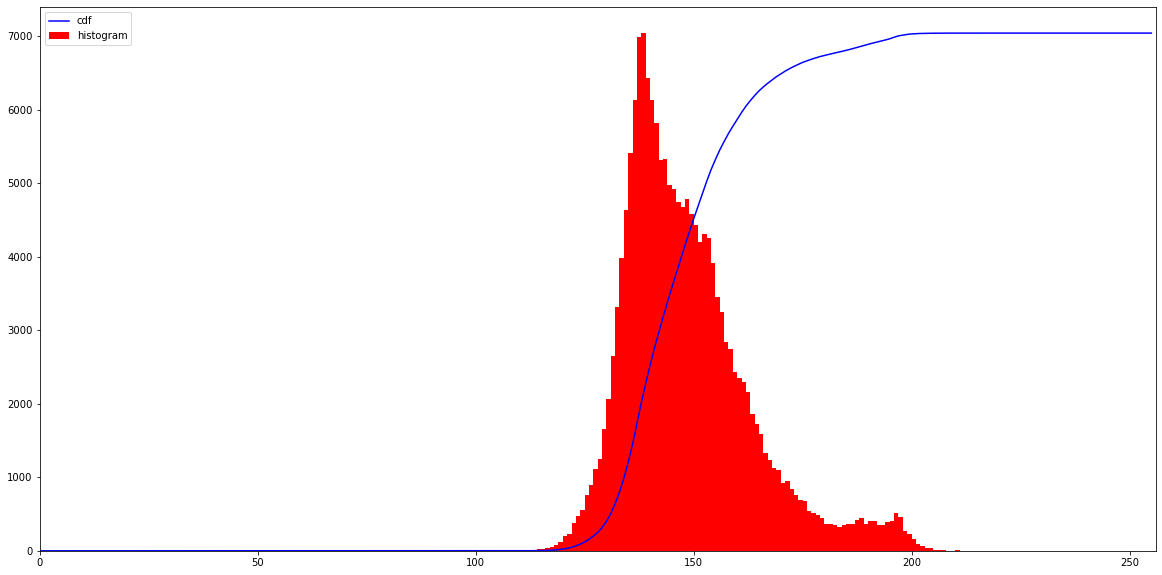

In [66]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

In [67]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')


In [68]:
img2 = cdf[img]


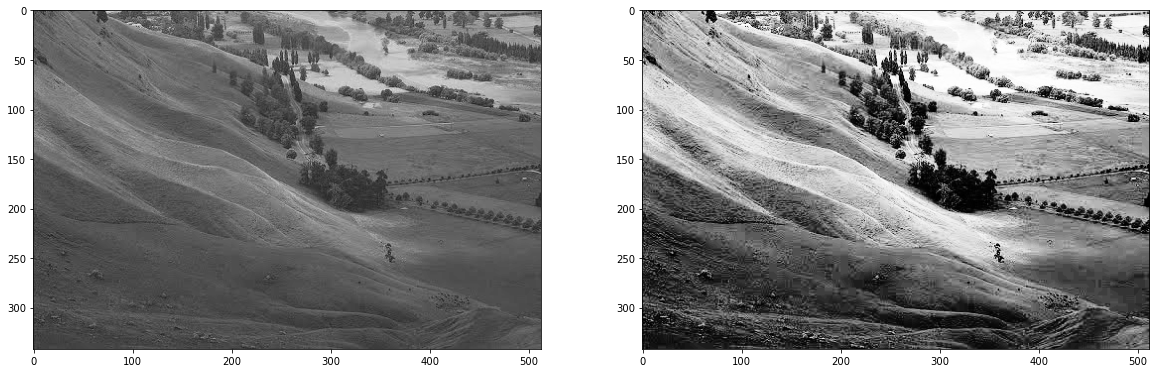

In [71]:
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(img2, 'gray')
plt.show()

In [73]:
img = cv2.imread('tsukuba_L.png',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imwrite('clahe_2.jpg',cl1)

True

In [ ]:
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(img2, 'gray')
plt.show()